# Lab 2



*   Data and Sampling Distributions.
*   Standard error. Markov, Chebyshev inequalities.
*   CLT

1) Suppose you are cooking porridge. To find out whether you have salted porridge or not, you do not need to eat all the porridge. Can you try just one spoon?

Porridge - population, one spoon of a porridge - sample

> Answer: yes, it's enough to try one spoon of porrige. Similarly, one could jurge about whole population based on just some sample of it (given it's representative)

2) If we tried to conduct a study in order to identify the level of knowledge in the field of computer vision on 50 students of the DSAI track, then on what population do we collect our samples?

*   students of the DSAI track
*   men and women from 18 to 25
*   students of Innopolis Universtiy

> Answer: the first population "students of the DSAI track" is the most representative for this task

3) If the sample size is large enough (more than 100), then such a sample is representative.


*   Yes
*   No
*   Depends on the sampling method

> Answer: It depends on the sampling method. If the sampling does not cover whole considered population, than the sample is non-representative

Difference between descriptive and inferential statistics? (Sample statistics, population parametes)

## I know the population distribution

Text(0, 0.5, 'PDF')

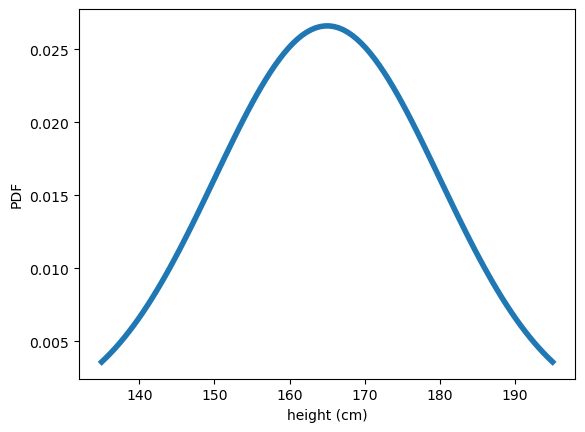

In [1]:
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

mu = 165           #sample mean
sigma = 15         #sample standard deviation
height = stats.norm(mu, sigma)
xs = np.linspace(mu-2*sigma, mu+2*sigma, 100)
ys = height.pdf(xs)
plt.plot(xs, ys, linewidth=4)
plt.xlabel('height (cm)')
plt.ylabel('PDF')

In [2]:
type(height)

scipy.stats._distn_infrastructure.rv_continuous_frozen

In [3]:
def make_sample(n=100):
    sample = height.rvs(n)
    return sample

In [4]:
number_of_elements = 100
sample = make_sample(number_of_elements)
sample

array([184.30431912, 158.24634369, 161.41524064, 131.95061392,
       149.50418327, 188.89966765, 155.44865077, 159.48979012,
       186.9560573 , 162.06517672, 156.26824633, 170.2670156 ,
       143.59605098, 165.66784254, 174.83922673, 171.21225014,
       149.00764716, 174.47626688, 215.61837524, 179.38413782,
       155.25808098, 161.13729958, 189.95561762, 162.06804054,
       174.81084561, 167.96055479, 188.19894743, 171.37522587,
       172.33839977, 170.34173213, 151.43730708, 147.94529486,
       159.33855936, 152.8532513 , 151.49148396, 179.27701734,
       161.61986428, 155.74555954, 148.0801603 , 175.82222309,
       157.51624131, 143.19489305, 174.70970139, 180.48697763,
       142.01056661, 175.29454328, 166.40451818, 137.66222822,
       179.43550975, 185.51329031, 183.62807551, 170.41256715,
       178.01681187, 140.45256939, 160.74102093, 166.67739721,
       150.05979454, 171.33911065, 149.37391033, 162.75229756,
       160.58948022, 161.86971078, 168.5339094 , 167.96

In [5]:
sample.mean(), sample.std() #compare it with mu and sigma

(164.6377439440538, 15.286448468487746)

In [6]:
def sample_stat(sample):
    return sample.mean()

def compute_sampling_distribution(n=100, iters=1000):
    stats = [sample_stat(make_sample(n)) for i in range(iters)]
    return np.array(stats)

In [7]:
number_of_iterations = 1000
sample_means = compute_sampling_distribution(n=number_of_elements, iters=number_of_iterations)
sample_means

array([163.1398643 , 165.52430053, 165.0594431 , 166.51388604,
       165.39007637, 163.68461938, 165.64409781, 164.49171236,
       164.67532799, 166.01861742, 168.41882851, 164.8066803 ,
       164.81898826, 162.94468893, 164.06191356, 162.4924623 ,
       165.87604112, 166.2264653 , 161.9693482 , 166.62808006,
       167.4362711 , 166.24281606, 165.8334475 , 165.76342148,
       164.75283557, 165.77003541, 166.57610733, 167.67513923,
       165.98275387, 165.86025294, 163.91877337, 165.50286341,
       165.0454901 , 166.79056914, 165.66522708, 166.42885064,
       165.37505923, 165.84437119, 162.9171759 , 163.501204  ,
       164.29957633, 163.79772111, 164.60638097, 166.60028408,
       162.73153335, 164.74528207, 166.30044832, 166.39611021,
       165.82952393, 166.82488306, 163.07820811, 166.98098395,
       162.83229476, 167.08185726, 164.05579699, 162.70692616,
       162.45999851, 164.9224187 , 166.83169982, 165.15890825,
       164.87003449, 163.6599354 , 164.77371529, 167.33

Text(0, 0.5, 'count')

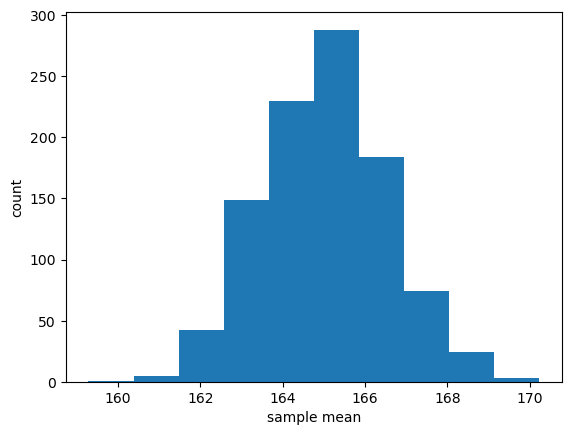

In [8]:
plt.hist(sample_means)
plt.xlabel('sample mean')
plt.ylabel('count')

In [9]:
sample_means.mean()

165.03600621753606

This value is close to our population mean, but... Let us look to the precision in the experiments!

In [10]:
std_err = sample_means.std()
std_err

1.5145125948074374

If we know the population distribution, but it is not normal...

Text(0, 0.5, 'count')

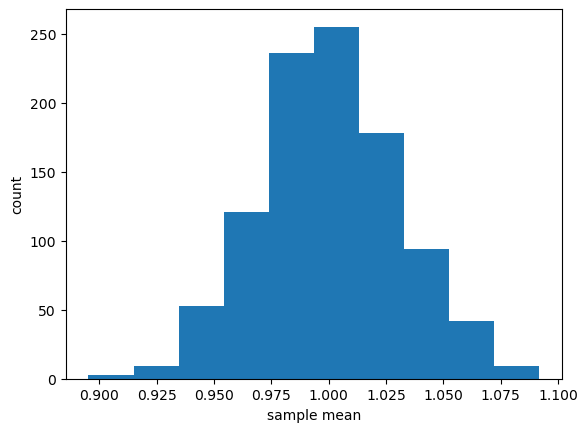

In [11]:
unknown_stats = [sample_stat(expon.rvs(size=1000)) for i in range(number_of_iterations)] #sampling distribution from exponential samples
plt.hist(unknown_stats)
plt.xlabel('sample mean')
plt.ylabel('count')

We can use a sample to build a population model.

In [12]:
class Resampler(object):

    def __init__(self, sample): #stores the actual sample
        self.sample = sample
        self.n = len(sample)

    def resample(self): #generates a new sample by choosing from the original sample with replacement
        new_sample = np.random.choice(self.sample, self.n, replace=True)
        return new_sample

    def sample_stat(self, sample): #computes the sample statistics
        return sample.mean()

    def compute_sampling_distribution(self, iters=1000): #collects the statistics from the experiments
        # TODO: compute statistic for each resample
        resampled_dists = [self.resample() for _ in range(iters)]
        stats = [self.sample_stat(resampled_dist) for resampled_dist in resampled_dists]
        return np.array(stats)

    def plot_sampling_distribution(self): #plots the sampling distribution
        sample_stats = self.compute_sampling_distribution()
        se = sample_stats.std()
        ci = np.percentile(sample_stats, [2.5, 97.5])

        plt.hist(sample_stats)
        plt.xlabel('sample statistic')
        plt.axvline(x=ci[0], color='red', label="2.5%")
        plt.text(ci[0] + 0.1, 0.1 * sample_stats.shape[0], "2.5%")
        plt.axvline(x=ci[1], color='red', label="97.5%")
        plt.text(ci[1] + 0.1, 0.1 * sample_stats.shape[0], "97.5%")
        plt.xlim(sample_stats.min() - sample_stats.std(), sample_stats.max() + sample_stats.std())
        plt.show()


## I don't know two distributions ☹

Text(0, 0.5, 'PDF')

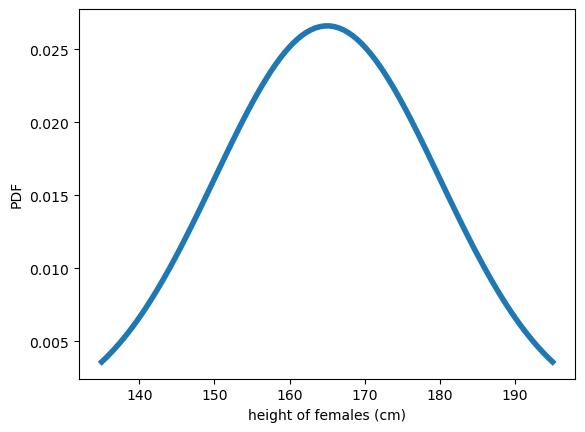

In [13]:
female_mu = 160           #sample mean for females
female_sigma = 12         #sample standard deviation for females
female_height = stats.norm(female_mu, female_sigma)
female_xs = np.linspace(135, 195, 100)
female_ys = height.pdf(xs)
plt.plot(female_xs, female_ys, linewidth=4)
plt.xlabel('height of females (cm)')
plt.ylabel('PDF')

Text(0, 0.5, 'PDF')

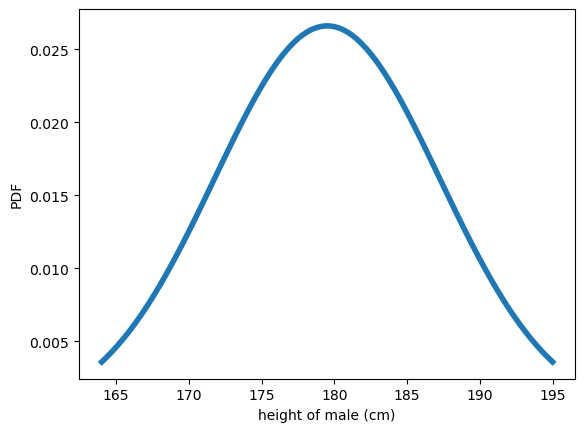

In [14]:
male_mu = 174           #sample mean for male
male_sigma = 10         #sample standard deviation for male
male_height = stats.norm(male_mu, male_sigma)
male_xs = np.linspace(164, 195, 100)
male_ys = height.pdf(xs)
plt.plot(male_xs, male_ys, linewidth=4)
plt.xlabel('height of male (cm)')
plt.ylabel('PDF')

In [15]:
male_height.mean() - female_height.mean()

14.0

In [16]:
number_of_males_and_females = 100
female_sample = female_height.rvs(number_of_males_and_females)
male_sample = male_height.rvs(number_of_males_and_females)

In [17]:
male_sample.mean() - female_sample.mean()

14.639056911184866

We will use [Cohen's d](https://en.wikipedia.org/wiki/Effect_size#Cohen's_d) to estimate the difference in heights:

$d = \frac{\bar x_1 - \bar x_2}{s},$

where $\bar x_1$ and $\bar x_2$ are sample means of males and females,

$s = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}}$ is a pooled standard deviation,

$s_1$ and $s_2$ are sample standard deviations of males and females,

$n_1$ and $n_2$ are the number of males and females in the samples.

In [18]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)

    # By default ddof = 0 and we get a biased estimate of the variance
    var1 = group1.var(ddof=1)
    var2 = group2.var(ddof=1)

    # Note: in some papers/books "-2" in denominator might be ommited
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    d = diff / np.sqrt(pooled_var)
    return d, np.sqrt(pooled_var)

In [19]:
d, stddev = CohenEffectSize(male_sample, female_sample)
(d, stddev)

(1.2383948226847226, 11.820993307650285)

The difference in heights between males and females is approximately equal to 1 pooled standard deviation. According to the table below we observe a large or very large difference:

| Effect size |  d   |
|-------------|------|
| Very small  | 0.01 |
| Small       | 0.2  |
| Medium      | 0.5  |
| Large       | 0.8  |
| Very large  | 1.2  |
| Huge        | 2    |

In [20]:
d * stddev

14.639056911184866

In [21]:
class CohenResampler(Resampler):
    def __init__(self, group1, group2):
        self.group1 = group1
        self.group2 = group2

    def resample(self):
        n, m = len(self.group1), len(self.group2)
        group1 = np.random.choice(self.group1, n, replace=True)
        group2 = np.random.choice(self.group2, m, replace=True)
        return group1, group2

    def sample_stat(self, groups):
        group1, group2 = groups
        return CohenEffectSize(group1, group2)[1]
    
    def plot_sampling_distribution(self):
        return super().plot_sampling_distribution()

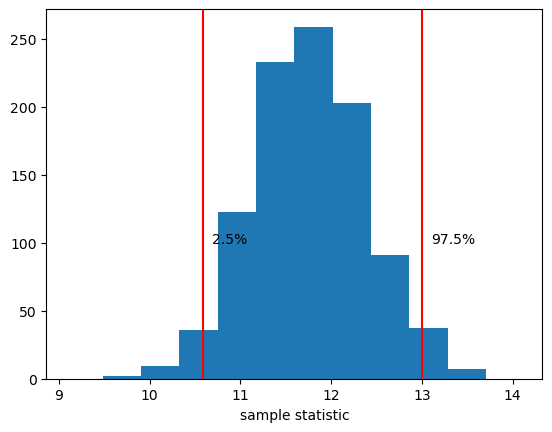

In [22]:
resampler = CohenResampler(male_sample, female_sample)
resampler.plot_sampling_distribution()

## Markov inequality

$$P(X \geq a) \leq \frac{E(X)}{a}$$

In [23]:
sample #sample of height that we've already generated

array([184.30431912, 158.24634369, 161.41524064, 131.95061392,
       149.50418327, 188.89966765, 155.44865077, 159.48979012,
       186.9560573 , 162.06517672, 156.26824633, 170.2670156 ,
       143.59605098, 165.66784254, 174.83922673, 171.21225014,
       149.00764716, 174.47626688, 215.61837524, 179.38413782,
       155.25808098, 161.13729958, 189.95561762, 162.06804054,
       174.81084561, 167.96055479, 188.19894743, 171.37522587,
       172.33839977, 170.34173213, 151.43730708, 147.94529486,
       159.33855936, 152.8532513 , 151.49148396, 179.27701734,
       161.61986428, 155.74555954, 148.0801603 , 175.82222309,
       157.51624131, 143.19489305, 174.70970139, 180.48697763,
       142.01056661, 175.29454328, 166.40451818, 137.66222822,
       179.43550975, 185.51329031, 183.62807551, 170.41256715,
       178.01681187, 140.45256939, 160.74102093, 166.67739721,
       150.05979454, 171.33911065, 149.37391033, 162.75229756,
       160.58948022, 161.86971078, 168.5339094 , 167.96

Markov inequality gives us the upper bound for the probabilities:

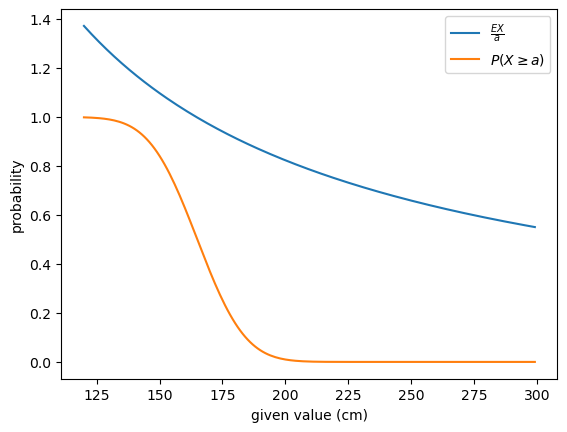

In [24]:
x = range(120,300)
y = []
for a in x:
  y.append(sample.mean()/a)
plt.plot(x, y, label=r"$\frac{EX}{a}$")

# TODO: plot an exact P(X >= a)
plt.plot(x, 1-height.cdf(x), label=(r"$P(X \geq a)$"))
plt.plot()
plt.xlabel('given value (cm)')
plt.ylabel('probability') #probability of the height being greated than the given value
plt.legend()
plt.show()

## Chebyshev inequality

$$P(|X-\mu|\geq k\sigma)≤\frac{1}{k^2}$$

In [25]:
k = range(1,10)
for i in k:
  print('P(|X-𝜇| >= {}𝜎) <= {}'.format(i, 1/(i*i)))

P(|X-𝜇| >= 1𝜎) <= 1.0
P(|X-𝜇| >= 2𝜎) <= 0.25
P(|X-𝜇| >= 3𝜎) <= 0.1111111111111111
P(|X-𝜇| >= 4𝜎) <= 0.0625
P(|X-𝜇| >= 5𝜎) <= 0.04
P(|X-𝜇| >= 6𝜎) <= 0.027777777777777776
P(|X-𝜇| >= 7𝜎) <= 0.02040816326530612
P(|X-𝜇| >= 8𝜎) <= 0.015625
P(|X-𝜇| >= 9𝜎) <= 0.012345679012345678


$$P(|X-\mu|\leq k\sigma)\geq 1 - \frac{1}{k^2}$$

In [26]:
k = range(1,10)
for i in k:
  print('P(|X-𝜇| <= {}𝜎) >= {}'.format(i, 1-(1/(i*i))))

P(|X-𝜇| <= 1𝜎) >= 0.0
P(|X-𝜇| <= 2𝜎) >= 0.75
P(|X-𝜇| <= 3𝜎) >= 0.8888888888888888
P(|X-𝜇| <= 4𝜎) >= 0.9375
P(|X-𝜇| <= 5𝜎) >= 0.96
P(|X-𝜇| <= 6𝜎) >= 0.9722222222222222
P(|X-𝜇| <= 7𝜎) >= 0.9795918367346939
P(|X-𝜇| <= 8𝜎) >= 0.984375
P(|X-𝜇| <= 9𝜎) >= 0.9876543209876543


Example, this means that at least 75\% of your data lies between $\mu-2\sigma$ and $\mu+2\sigma$. The inequality works for any distribution!!!

## Law of large numbers

$$\lim_{n \rightarrow ∞} P(|\bar{X} - \mu | \geq ϵ)=0, $$

$$\lim_{n \rightarrow ∞} P(|\bar{X} - \mu | < ϵ)=1 $$

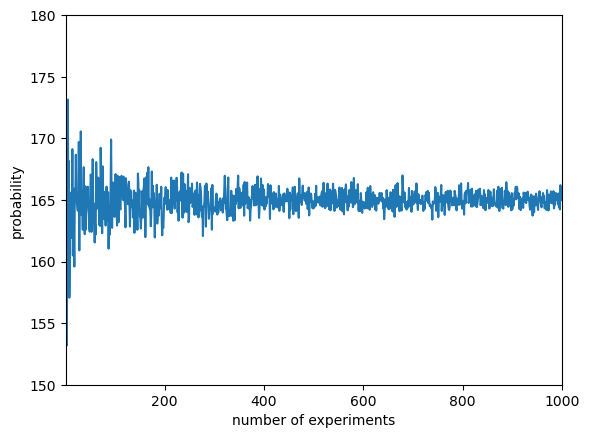

In [27]:
height_samples = [make_sample(i).mean() for i in range(1,1000)]
plt.plot(range(1,1000), height_samples)
plt.xlabel('number of experiments')
plt.ylabel('probability')
plt.ylim([150, 180])
plt.xlim([1, 1000])
plt.show()

## The resources

[Inferetntial statistics](https://github.com/AllenDowney/CompStats/blob/master/sampling_soln.ipynb)

[Pandas recap](https://github.com/tdpetrou/Learn-Pandas/blob/master/Selecting%20Subsets/01%20Selecting%20Subsets%20with%20%5B%20%5D%2C%20.loc%20and%20.iloc.ipynb)

[How NOT to do the indexing](https://github.com/tdpetrou/Learn-Pandas/blob/64b4795b393960df110c47f697bb7f77777f3e7c/Selecting%20Subsets/04%20How%20NOT%20to%20select%20subsets%20of%20data.ipynb)